In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
centers = [[2, 3], [4, 5], [7, 9]]
data, labels = make_blobs(n_samples=1000,
centers=np.array(centers),
random_state=1)
labels[:7]

array([0, 1, 1, 0, 2, 2, 2])

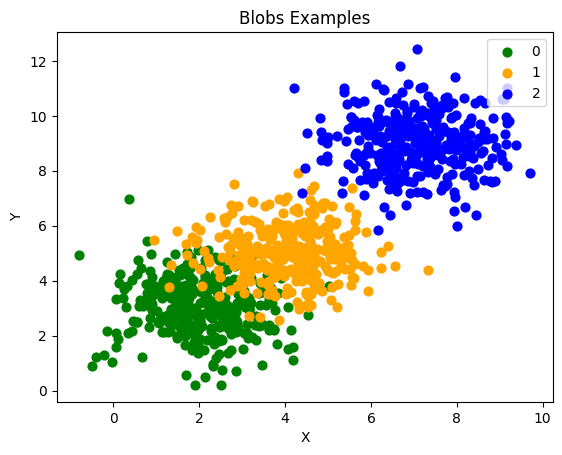

In [ ]:
fig, ax = plt.subplots()
colours = ('green', 'orange', 'blue')
for label in range(len(centers)):
  ax.scatter(x=data[labels==label, 0],y=data[labels==label, 1],c=colours[label],s=40,label=label)
ax.set(xlabel='X',
ylabel='Y',
title='Blobs Examples')
ax.legend(loc='upper right')

In [3]:
import numpy as np

labels = labels.reshape((labels.shape[0],1))
all_data = np.concatenate((data, labels), axis=1)
all_data[:7]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ]])

In [4]:
import numpy as np
a = np.array( [[1, 2], [3, 4]])
b = np.array( [5, 6])
b = b.reshape((b.shape[0], 1))
print(b)
x = np.concatenate( (a, b), axis=1)
x

[[5]
 [6]]


array([[1, 2, 5],
       [3, 4, 6]])

In [5]:
np.savetxt("squirrels.txt",
all_data,
fmt=['%.3f', '%.3f', '%1d'])
all_data[:10]


array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

In [6]:
file_data = np.loadtxt("squirrels.txt")
data = file_data[:,:-1]
labels = file_data[:,2:]
labels = labels.reshape((labels.shape[0]))


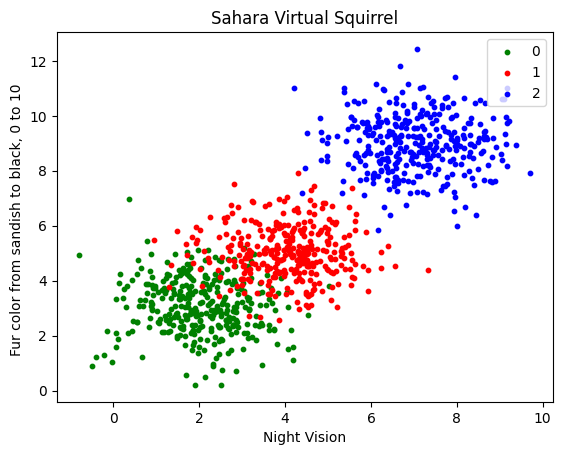

In [7]:
import matplotlib.pyplot as plt
colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
n_classes = 3
fig, ax = plt.subplots()
for n_class in range(0, n_classes):
  ax.scatter(data[labels==n_class, 0], data[labels==n_class,1],c=colours[n_class], s=10, label=str(n_class))
ax.set(xlabel='Night Vision',
ylabel='Fur color from sandish to black, 0 to 10 ',
title='Sahara Virtual Squirrel')
ax.legend(loc='upper right')


In [9]:
from sklearn.model_selection import train_test_split
data_sets = train_test_split(data,
labels,
train_size=0.8,
test_size=0.2,
random_state=42 # garantees same output for every run
)
train_data, test_data, train_labels, test_labels = data_sets


In [10]:
# import model
from sklearn.neighbors import KNeighborsClassifier
# create classifier
knn = KNeighborsClassifier(n_neighbors=8)
# train
knn.fit(train_data, train_labels)
# test on test data:
calculated_labels = knn.predict(test_data)
calculated_labels


array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       0., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

In [12]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(test_labels, calculated_labels))

Accuracy: 0.97
